# Setup

In [96]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('seaborn')

In [97]:
def plot_results (run_folder: str, strategy: str):
    run_folder_path = os.path.join(os.path.abspath('../'), 'records', run_folder)
    
    results = {
        'Infected': {
            'Color': 'red',
            'Totals': [],
            'STD': [] 
        },
        'Hospitalised': {
            'Color': 'green',
            'Totals': [],
            'STD': [] 
        },
        'Dead': {
            'Color': 'blue',
            'Totals': [],
            'STD': [] 
        },
    }
    
    for filename in os.listdir(run_folder_path):
        filename_path = os.path.join(run_folder_path, filename)
        match = re.match(r'[a-zA-Z]+\(\d+\,\s(\d+\.\d+)\)', filename)
        
        if match is None:
            continue
        
        rho = float(match.groups()[0])
        
        totals_df = pd.read_csv(os.path.join(filename_path, 'totals.csv'))
        
        for key in results.keys():
            results[key]['Totals'].append((rho, totals_df.iloc[-1][key]))
            results[key]['STD'].append((rho, totals_df.iloc[-1][key + '_STD']))
        
    for key in results.keys():
        results[key]['Totals'].sort()
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6*3, 4))
    
    # * Subplot 1 = Final Totals vs Rhos
    for key in results.keys():
        X = [x for x, _ in results[key]['Totals']]
        y = [y for _, y in results[key]['Totals']]
        yerr = [y for _, y in results[key]['STD']]
        
        # axes[0].errorbar(X, y, yerr=yerr, fmt="o", label=key)
        axes[0].scatter(X, y, label=key)
        axes[0].plot(X, y, alpha=0.25)
    
    axes[0].set_xlim(0, 1)
    axes[0].set_ylim(-0.025, 1)
    axes[0].set_title('Rhos vs State Totals')
    axes[0].set_xlabel('Percentage of Population Vaccinateed, ρ')
    axes[0].set_ylabel('Total Percentage of Population')
    axes[0].legend()
    
    # * Subplot 2 = Epidemic Thresholds for different rhos
    critical_folder_path = os.path.join(os.path.abspath('../'), 'records', 'critical_'+run_folder)
    for filename in os.listdir(critical_folder_path):
        filename_path = os.path.join(critical_folder_path, filename)
        match = re.match(r'(?:[A-Z]+\_)+\d+\_(\d+\.\d+)', filename)
        
        if match is None:
            continue
        
        rho = float(match.groups(0)[0])
        results_df = pd.read_csv(filename_path)
        
        Xy = list(zip(results_df['InfectionRate'].values, results_df['TotalInfected'].values))
        Xy.sort()
        
        axes[1].scatter([x for x, _ in Xy], [y for _, y in Xy], label=f'rho={rho:.3f}')
        axes[1].plot([x for x, _ in Xy], [y for _, y in Xy], alpha=0.25)
        axes[1].legend()
        
    axes[1].set_title('Infection Rate vs Total Infections')
    axes[1].set_xlabel('Infection Rate, β')
    axes[1].set_ylabel('Total Infections')
    
    # * Subplot 3 = 'Flatness' measure
    flatness_results = []
    for filename in os.listdir(run_folder_path):
        filename_path = os.path.join(run_folder_path, filename)
        match = re.match(r'[a-zA-Z]+\(\d+\,\s(\d+\.\d+)\)', filename)
        
        if match is None:
            continue
        
        rho = float(match.groups()[0])
        
        states_df = pd.read_csv(os.path.join(filename_path, 'states.csv'))
        
        flatness_results.append((rho, np.std(states_df['Hospitalised'].values))) # type: ignore   
         
    flatness_results.sort()
    axes[2].plot([x for x, _ in flatness_results], [y for _, y in flatness_results])
    axes[2].set_title("Rhos vs 'Flatness' of Hospitalised Curve")
    axes[2].set_xlabel('Percentage of Population Vaccinateed, ρ')
    axes[2].set_ylabel("'Flatness' of Hospitalised Curve")
    
    plt.show()

# Section 1

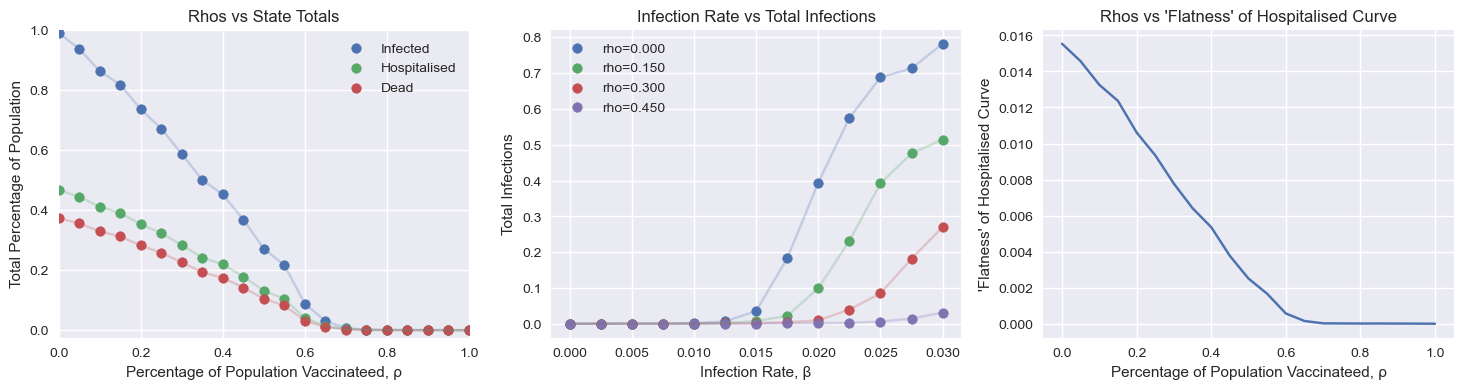

In [98]:
plot_results('section_1a', 'RandomOneOff')

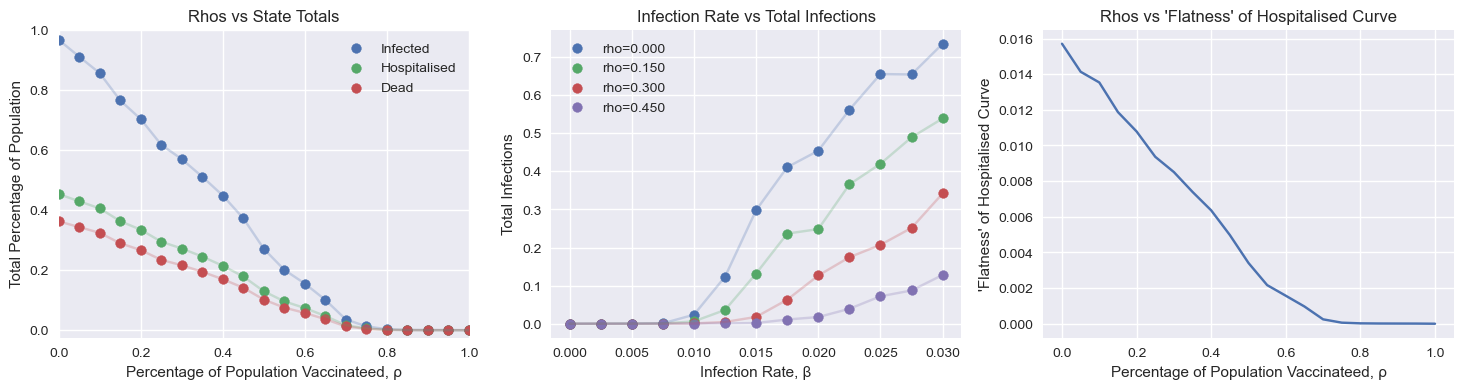

In [99]:
plot_results('section_1b', 'RandomOneOff')

# Section 2

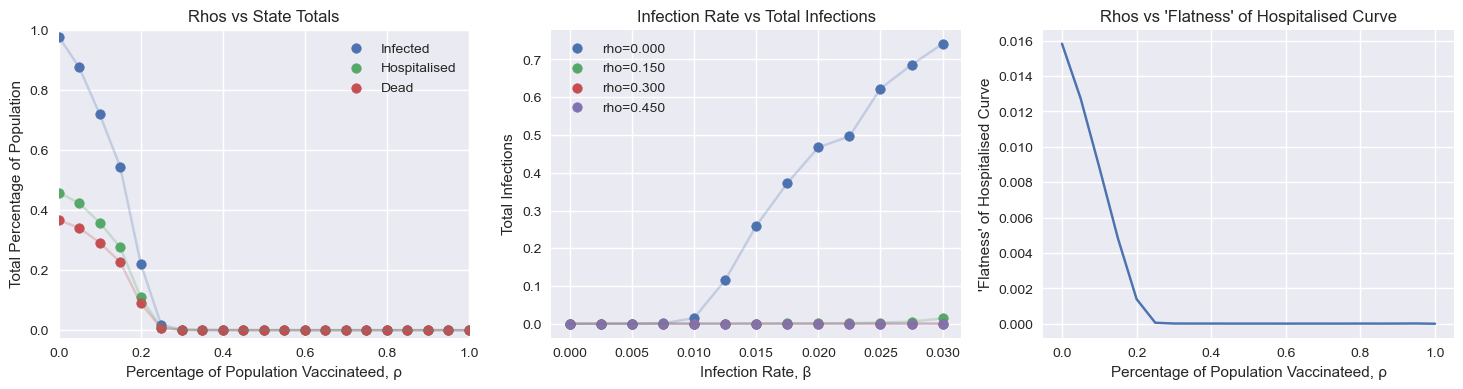

In [100]:
plot_results('section_2a', 'HighestOneOff')

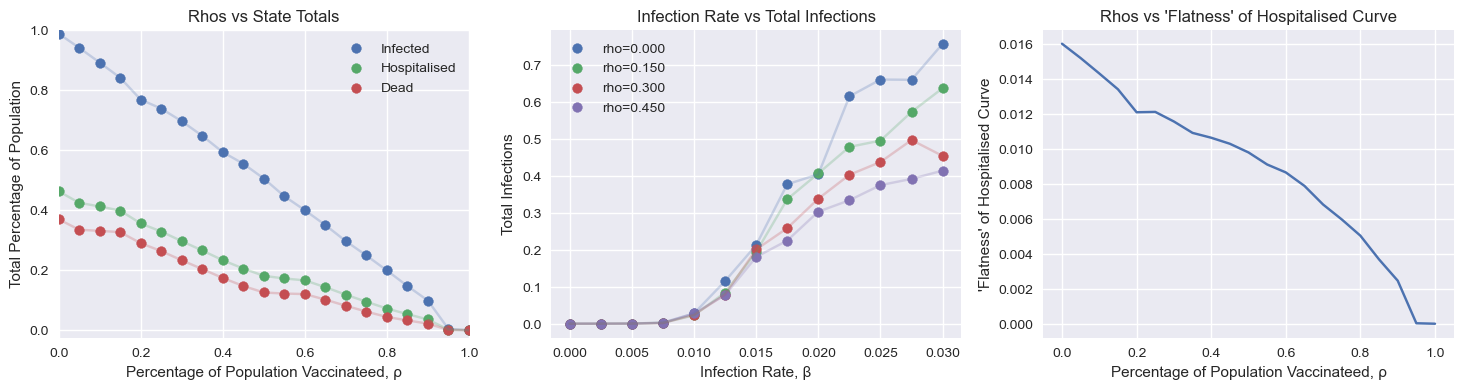

In [101]:
plot_results('section_2b', 'LowestOneOff')

# Section 3

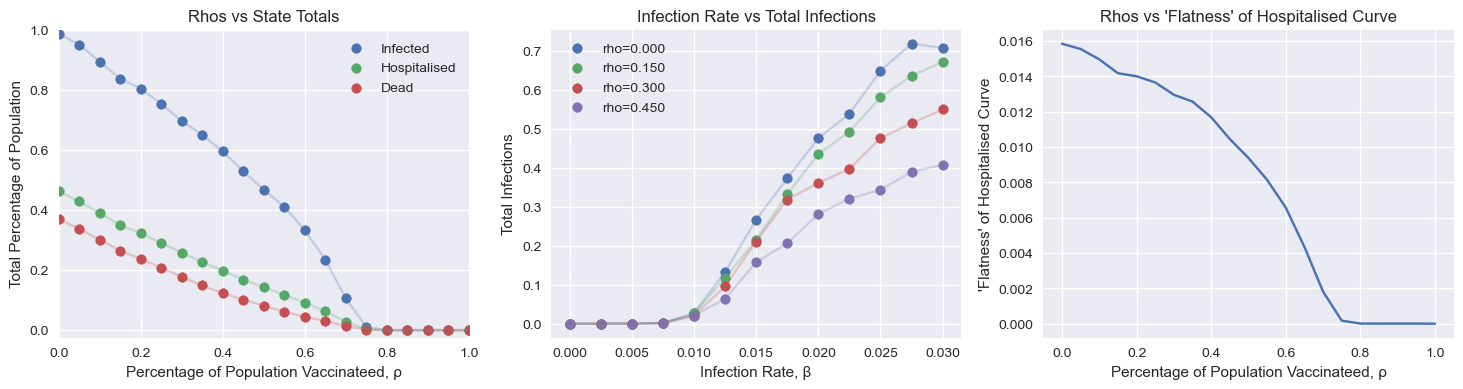

In [102]:
plot_results('section_3a', 'OldestOneOff')

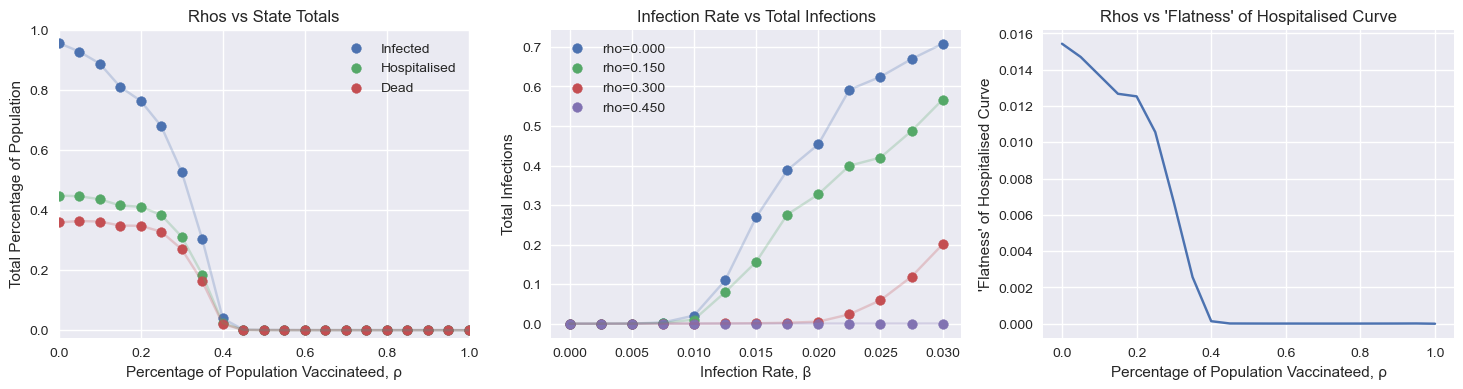

In [103]:
plot_results('section_3b', 'YoungestOneOff')